## 1. Customer Segmentation
<p><em>These recommendations are so on point! How does this know me so well?</em></p>
<p><img src="https://www.smartkarrot.com/wp-content/uploads/2020/04/Customer-segmentation-and-campaigns.png" alt="Project Image Record" width="600px"></p>
<p>Segmentation refers to the division of a market or service on the basis of various features that bind every group together. <code>Customer Segments</code> are groups of customers that share common characteristics like industry, number of employees, products, location, etc for B2B marketing and gender, age, preferences, demographics, etc for the B2C market. These segments are then treated with different engagement strategies. </p>
<p>The technique of customer segmentation is dependent on several key differentiators that divide customers into groups to be targeted. Data related to demographics, geography, economic status as well as behavioral patterns play a crucial role in determining the company direction towards addressing the various segments.</p>
<p>In the first step of this data science project, we will perform data exploration. We will import the essential packages required for this role and then read our data. Finally, we will go through the input data to gain necessary insights about it.</p>
<p>Let's start by creating two pandas <code>DataFrames</code> out of these files that we can merge so we have features and labels (often also referred to as <code>X</code> and <code>y</code>) for the classification later on.</p>

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

 Import CSV file into Pandas Dataframe

In [158]:
df_cust=pd.read_csv('Mall_Customers.csv')

In [159]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [160]:
df_cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [161]:
df_cust.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Check for NA values in columns of Dataframe

<p> If our dataset consists of missing values then below two strategies can be followed: </p>
    <p>1. <u>For Numeric Columns</u> : Replace NaN values with mean values. This is known as <b> Mean Imputation </b></p>
    <p>2. <u>For Non-Numeric Columns</u> : Mean imputation strategy would not work here.We are going to impute these missing values with the most frequent values as present in the respective columns</p>

In [162]:
df_cust.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [163]:
df_cust.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Since there are no null values in dataset, we are not required to replace missing values. In case of <b>Mean imputation</b>, we would use the below mean values to replace with the missing values

In [164]:
np.mean(df_cust)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In case of <u>Non Numerical column</u>, we can choose the most frequent value of that column using the below, and replace the Null values

In [165]:
df_cust['Genre'].value_counts().index[0]

'Female'

In [166]:
df_cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [167]:
df_cust[['CustomerID','Genre']].groupby('Genre').count()

,CustomerID
Genre,
Female,112
Male,88


In [168]:
df_cust['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

<AxesSubplot:ylabel='Genre'>

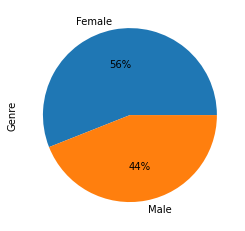

In [169]:
df_cust['Genre'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [170]:
df_cust_male=df_cust[df_cust['Genre']=='Male']
df_cust_female=df_cust[df_cust['Genre']=='Female']

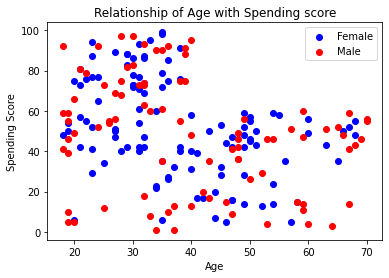

In [171]:
plt.scatter(df_cust_female['Age'],df_cust_female['Spending Score (1-100)'],c='blue',label='Female')
plt.scatter(df_cust_male['Age'],df_cust_male['Spending Score (1-100)'],c='red',label='Male')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Relationship of Age with Spending score')
plt.show()

## Insights on Mall Customers data:

1. Total 200 rows and 5 columns, with 1 column as String, and 4 columns as integer
2. Minimum Age : 18; Maximum Age : 70; Average Age : ~39
3. Number of Females : 112 (56%); Number of Males : 88 (44%)
4. Spending Score decreases with Age; Females have more spending score than males in the age group of 60-70 years

In [172]:
df_genre=pd.DataFrame({'Genre':['Female','Male'],'Genre_code':[0,1]})

Created a new Dataframe df_genre, and apply Merge on Dataframes

In [173]:
df_genre.head()

,Genre,Genre_code
0,Female,0
1,Male,1


In [174]:
# Merge two dataframes

df_cust=df_cust.merge(df_genre,on='Genre')

In [175]:
df_cust['Genre_code'].value_counts()

0    112
1     88
Name: Genre_code, dtype: int64

In [176]:
df_cust.drop('Genre',axis=1,inplace=True)

In [177]:
df_cust.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Genre_code'],
      dtype='object')

In [178]:
df_cust.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_code
0,1,19,15,39,1
1,2,21,15,81,1
2,9,64,19,3,1
3,11,67,19,14,1
4,15,37,20,13,1


In [179]:
df_cust.drop('CustomerID',axis=1,inplace=True)

In [180]:
df_cust.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_code
0,19,15,39,1
1,21,15,81,1
2,64,19,3,1
3,67,19,14,1
4,37,20,13,1


In [181]:
from sklearn.cluster import KMeans

In [182]:
model=KMeans(n_clusters=4)

In [183]:
model.fit(df_cust)

KMeans(n_clusters=4)

In [184]:
labels=model.predict(df_cust)

In [185]:
labels

array([3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2])

In [186]:
model.cluster_centers_

array([[44.89473684, 48.70526316, 42.63157895,  0.37894737],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [40.39473684, 87.        , 18.63157895,  0.52631579],
       [24.82142857, 28.71428571, 74.25      ,  0.5       ]])

In [187]:
model.inertia_

104414.67534220168

# Visualising with Matplotlib and Seaborn

In [188]:
xs=df_cust['Annual Income (k$)']

In [189]:
ys=df_cust['Spending Score (1-100)']

Text(0.5, 1.0, 'KMeans Clustering')

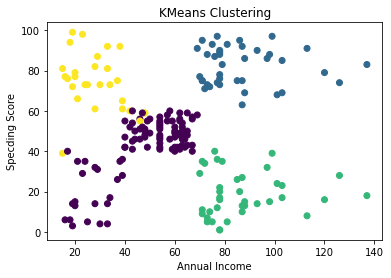

In [190]:
#Scatter plot using matplotlib

plt.scatter(xs,ys,c=labels)
plt.xlabel('Annual Income')
plt.ylabel('Specding Score')
plt.title('KMeans Clustering')

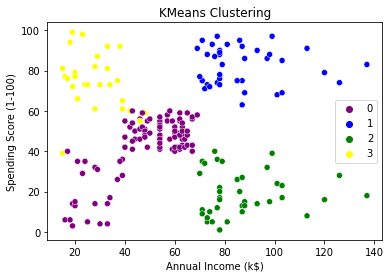

<Figure size 576x576 with 0 Axes>

In [191]:
# Scatter plot using Seaborn

sns.scatterplot(x=xs,y=ys,hue=labels,palette=['Purple','blue','green','yellow']).set(title='KMeans Clustering')
plt.figure(figsize=(8,8))
plt.show()

## Applying Principal Component Analysis

In [192]:
from sklearn.decomposition import PCA

In [193]:
pca=PCA()

In [194]:
pca.fit(df_cust)

PCA()

In [195]:
pca.n_components_

4

In [196]:
features=range(pca.n_components_)

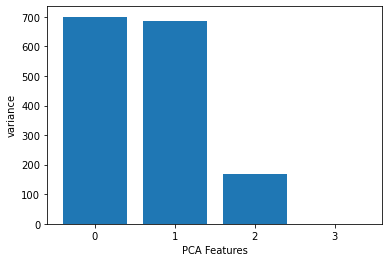

In [197]:
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('variance')
plt.show()

The above plot shows that 2 features cover the maximum variance, hence 2 principal components can be used to represent the dataset

In [198]:
pca=PCA(n_components=2)

In [199]:
pca.fit(df_cust)

PCA(n_components=2)

In [200]:
transformed=pca.transform(df_cust)

In [201]:
print(transformed.shape)

(200, 2)


In [202]:
x1=transformed[:,0]

In [203]:
y1=transformed[:,1]

<AxesSubplot:>

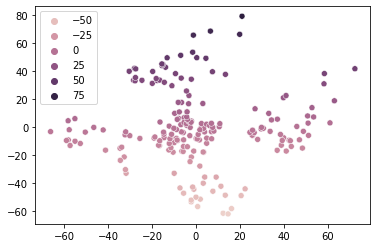

In [204]:
#plt.scatter(x1,y1,c=y1)
sns.scatterplot(x=x1,y=y1,hue=y1)

In [205]:
df_customers=pd.read_csv('Mall_Customers.csv')

In [206]:
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Applying Standardization and PCA on dataset, before using KMeans

In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
scaler=StandardScaler()

In [209]:
#need to convert 'Genre' column into integer
df_customers_new=df_customers.merge(df_genre, on='Genre')

In [210]:
df_customers_new.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_code
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,9,Male,64,19,3,1
3,11,Male,67,19,14,1
4,15,Male,37,20,13,1


In [211]:
df_customers_new.drop('Genre',axis=1,inplace=True)

In [212]:
scaled_data=scaler.fit_transform(df_customers_new)

In [213]:
np.mean(scaled_data)

-6.750155989720952e-17

In [214]:
np.std(scaled_data)

1.0

In [215]:
pca1=PCA()

In [216]:
pca1.fit(scaled_data)

PCA()

In [217]:
pca1.explained_variance_

array([1.99507004, 1.35420929, 0.97725931, 0.67613098, 0.02245601])

In [218]:
pca1.explained_variance_ratio_

array([0.39701894, 0.26948765, 0.1944746 , 0.13455007, 0.00446875])

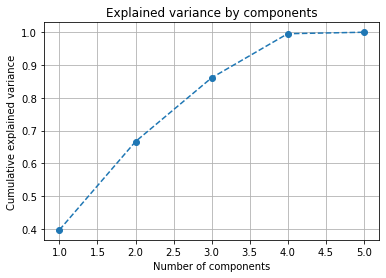

In [219]:
#plt.figure(figsize=(10,6))
plt.plot(range(1,6),pca1.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained variance by components')
plt.grid()
plt.show()

From the above plot, we can observe that 80% variance is explained by 2 components, hence we take two principal components.

In [220]:
pca2=PCA(n_components=2)
pca2.fit(scaled_data)
scores_pca=pca2.transform(scaled_data)

In [221]:
wcss=[]
for i in range(1,20):
    kmeans_pca=KMeans(n_clusters=i,random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)
    

In [222]:
wcss

[666.5065869634224,
 385.6270335084618,
 264.2784589214622,
 175.93286483235164,
 135.94379609345728,
 111.52482520602273,
 96.84709551411156,
 85.4240313358027,
 74.93196812915876,
 66.51208146368644,
 60.18330336712561,
 53.836473475048464,
 49.551727410936145,
 46.110325094622546,
 41.910754075227764,
 38.63064798537609,
 35.89133550699827,
 33.303112996311015,
 31.244132603641606]

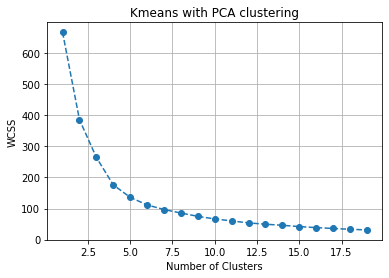

In [223]:
#plt.figure(figsize=(10,8))
plt.plot(range(1,20),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Kmeans with PCA clustering')
plt.grid()
plt.show()

From the above plot, we can observe that the elbow comes at around cluster 4 and 5. We move forward by taking 4 cluster.

In [224]:
kmeans_pca=KMeans(n_clusters=4,random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [225]:
df_pca_new=pd.concat([df_customers_new,pd.DataFrame(scores_pca)],axis=1)

In [226]:
df_pca_new.columns.values[-2:]=['Component1','Component2']

In [227]:
df_pca_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_code,Component1,Component2
0,1,19,15,39,1,-2.316965,-0.454190
1,2,21,15,81,1,-2.272391,-1.474104
2,9,64,19,3,1,-2.242366,2.726501
3,11,67,19,14,1,-2.214930,2.581676
4,15,37,20,13,1,-2.074081,1.130788


In [228]:
df_pca_new['Segment_PCA']=kmeans_pca.labels_

In [229]:
df_pca_new.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_code,Component1,Component2,Segment_PCA
0,1,19,15,39,1,-2.316965,-0.454190,3
1,2,21,15,81,1,-2.272391,-1.474104,3
2,9,64,19,3,1,-2.242366,2.726501,1
3,11,67,19,14,1,-2.214930,2.581676,1
4,15,37,20,13,1,-2.074081,1.130788,1


In [230]:
# Number of customers in each cluster

df_pca_new['Segment_PCA'].value_counts().sort_index()

0    60
1    63
2    35
3    42
Name: Segment_PCA, dtype: int64

In [231]:
df_pca_new['Segment']=df_pca_new['Segment_PCA'].map({0:'First',1:'Second',2:'Third',3:'Fourth'})

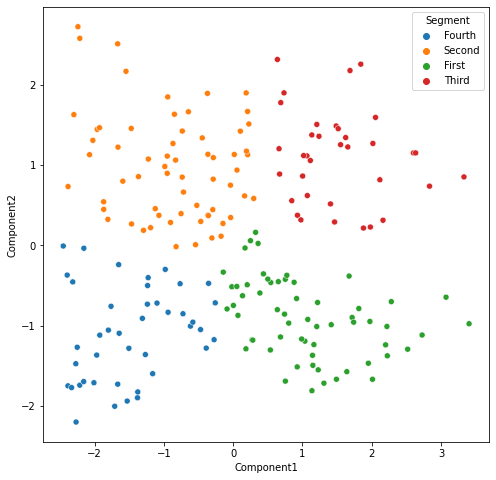

In [232]:
x=df_pca_new['Component1']
y=df_pca_new['Component2']
plt.figure(figsize=(8,8))
sns.scatterplot(x=x,y=y,hue=df_pca_new['Segment'])
plt.show()

In [233]:
print(kmeans_pca.inertia_)

175.93286483235164


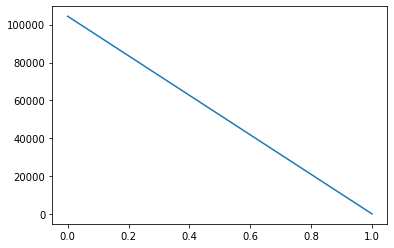

In [234]:
plt.plot([model.inertia_,kmeans_pca.inertia_])

## Insights using KMeans(4 clusters) before and after Standardization and PCA on Dataset

 1. The inertia of KMeans model before applying standardization and PCA comes out to be a large value: 104414.67534220168
 2. The inertia of KMeans model after standardizing the data and applying PCA comes out to be a small value: 175.93286483235164